In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_d = pd.read_excel(os.path.join('Comed_All.xlsx'))
del df_d['Year']
del df_d['Month']
del df_d['Day']
del df_d['Day_of_Week']
del df_d['Weekend']
del df_d['Datetime']

df_d.head()

,MW,Utility,Temp(f)
0,10419,COMED,32.0
1,9940,COMED,32.0
2,9604,COMED,35.6
3,9318,COMED,37.4
4,9224,COMED,37.4


In [3]:
df_2016pos = df_d[df_d['Temp(f)'] >= 60].copy()
df_2016neg = df_d[df_d['Temp(f)'] < 60].copy()

In [4]:
X = df_2016pos["Temp(f)"].values.reshape(-1, 1)
y = df_2016pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (10363, 1) (10363, 1)


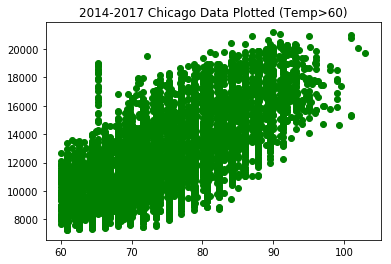

In [5]:
plt.scatter(X, y,color='g')
plt.title("2014-2017 Chicago Data Plotted (Temp>60)")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.47085402483582756
Testing Score: 0.4575489701351089


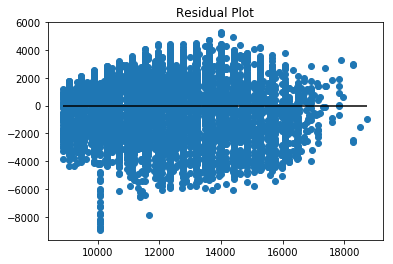

In [8]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

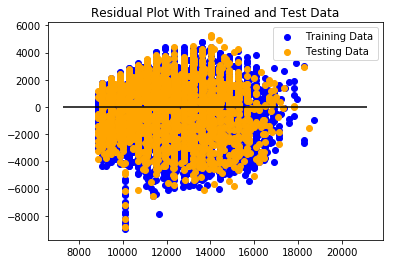

In [9]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [10]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[229.9277851]]
y-axis intercept:  [-4929.39529989]


In [11]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -4929.39529989+ 229.9277851 * x_min
y_max = -4929.39529989+ 229.9277851 * x_max

Actual Min Value: 7263
Predicted Min Value: [[8868.5710838]]
Actual Max Value: 21175
Predicted Max Value: [[18750.86728728]]


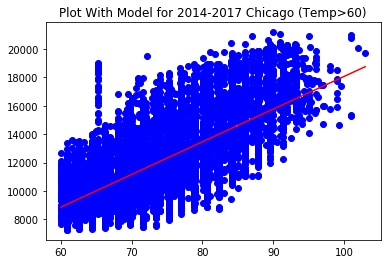

In [12]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2014-2017 Chicago (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [13]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [9036]
Predicted output: [10291.82407355]
Prediction Error: [1255.82407355]


In [14]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [15]:
for x in range(len(df_2016pos)):
   modeldf.loc[modeldf.Actual == df_2016pos.iloc[x].MW,'Temp'] =df_2016pos.iloc[x]['Temp(f)']

In [16]:
modeldf

,Actual,Error,Predicted,Temp
0,9036.0,1255.824074,10291.824074,73.40
1,8550.0,1741.824074,10291.824074,62.60
2,8242.0,2463.694087,10705.694087,68.00
3,8059.0,2646.694087,10705.694087,68.00
4,7980.0,2725.694087,10705.694087,64.40
5,8214.0,2491.694087,10705.694087,60.80
6,8835.0,1042.954060,9877.954060,64.40
7,9849.0,28.954060,9877.954060,71.60
8,10379.0,-501.045940,9877.954060,63.00
9,10728.0,-1263.915953,9464.084047,60.80


In [17]:
X = df_2016neg["Temp(f)"].values.reshape(-1, 1)
y = df_2016neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (9783, 1) (9783, 1)


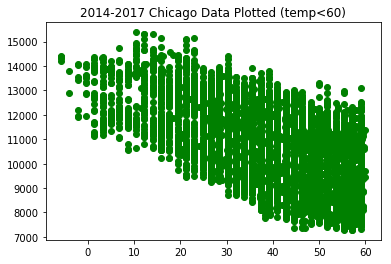

In [18]:
plt.scatter(X, y,color='g')
plt.title("2014-2017 Chicago Data Plotted (temp<60)")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [20]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28976913560854656
Testing Score: 0.27884734849192194


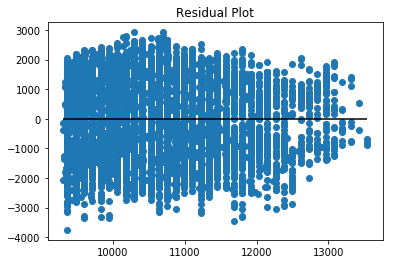

In [21]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

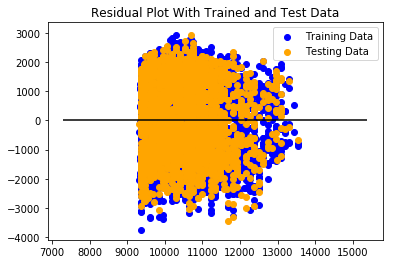

In [22]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [23]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-64.43548017]]
y-axis intercept:  [13168.1093492]


In [24]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  13168.1093492+ (-64.43548017 * x_min)
y_max = 13168.1093492+ (-64.43548017 * x_max)

Actual Min Value: 7286
Predicted Min Value: [[13541.83513419]]
Actual Max Value: 15385
Predicted Max Value: [[9303.91360337]]


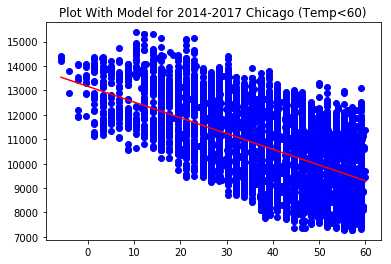

In [25]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2014-2017 Chicago (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [26]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [10419]
Predicted output: [11106.17398374]
Prediction Error: [687.17398374]


In [27]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [28]:
for x in range(len(df_2016neg)):
   modeldf.loc[modeldf.Actual == df_2016neg.iloc[x].MW,'Temp'] =df_2016neg.iloc[x]['Temp(f)']

In [29]:
modeldf

,Actual,Error,Predicted,Temp
0,10419.0,687.173984,11106.173984,24.80
1,9940.0,1166.173984,11106.173984,39.20
2,9604.0,1270.206255,10874.206255,57.99
3,9318.0,1440.222391,10758.222391,55.40
4,9224.0,1534.222391,10758.222391,32.00
5,9209.0,1549.222391,10758.222391,37.40
6,9343.0,1415.222391,10758.222391,55.40
7,9715.0,927.238527,10642.238527,33.80
8,9809.0,717.254662,10526.254662,44.60
9,9974.0,552.254662,10526.254662,30.20
